#### Spectral graph cut using normalized Laplacian ####

I made an error in class on March 31 on the way to use eigenvalues of the graph Laplacian to find multiple partitions, so I'll fix that now.

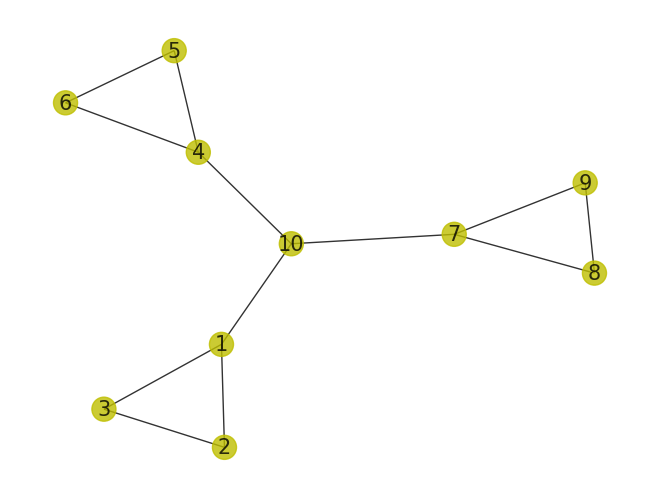

In [3]:
import networkx as nx
from matplotlib import pyplot as plt
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G.add_edges_from([(1,2),(1,3),(2,3),(4,5),(4,6),(5,6),(7,8),(7,9),(8,9),(1,10),(4,10),(7,10)])
colormap = []
[colormap.append('y') for nodes in G.nodes()]
pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 300,font_size = 15, alpha=0.8)

Find the normalized graph Laplacian $D^{-\frac{1}{2}}LD^{-\frac{1}{2}}$. Do a sanity check to make sure there are ones on the diagonal.

In [4]:
from networkx import linalg as LA
normalized_Laplacian = LA.normalized_laplacian_matrix(G).toarray()
print(normalized_Laplacian)

[[ 1.         -0.40824829 -0.40824829  0.          0.          0.
   0.          0.          0.         -0.33333333]
 [-0.40824829  1.         -0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.40824829 -0.5         1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.         -0.40824829 -0.40824829
   0.          0.          0.         -0.33333333]
 [ 0.          0.          0.         -0.40824829  1.         -0.5
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.40824829 -0.5         1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.         -0.40824829 -0.40824829 -0.33333333]
 [ 0.          0.          0.          0.          0.          0.
  -0.40824829  1.         -0.5         0.        ]
 [ 0.          0.          0.          0.          0.  

Find the fiedler vector

In [5]:
# I don't believe the following code works because each time I run it I 
# get a different answer, even if I normalize it
fiedler_vector = LA.fiedler_vector(G,normalized = True)
print(fiedler_vector/(fiedler_vector.T@fiedler_vector))

[-2.49263835e-02 -2.68391879e-02 -2.68391881e-02 -3.75085615e-01
 -4.03868928e-01 -4.03868928e-01  4.00012004e-01  4.30708108e-01
  4.30708108e-01  7.65358777e-09]


Try again to find the fiedler eigenvector with eigenvalue solver

In [6]:
import numpy as np
eig_values, eig_vectors = np.linalg.eig(normalized_Laplacian)
print("eigenvalues are ",sorted(eig_values)) # Smallest eigenvalue won't be exactly 0 because that's not how eigenvalue solvers work
sorted_indices = np.argsort(eig_values)
print("fiedler value is ",eig_values[sorted_indices[1]]) # print the second smallest eigenvalue
fiedler_vector = eig_vectors[:,sorted_indices[1]]
print("fiedler vector is ",fiedler_vector)

eigenvalues are  [1.6809606916635067e-17, 0.12084713039410389, 0.12084713039410411, 0.7712864461218314, 1.3791528696058957, 1.3791528696058961, 1.4999999999999996, 1.4999999999999998, 1.5000000000000013, 1.728713553878169]
fiedler value is  0.12084713039410389
fiedler vector is  [ 8.01865937e-02  8.63399499e-02  8.63399499e-02 -4.21980264e-01
 -4.54362172e-01 -4.54362172e-01  3.41793671e-01  3.68022222e-01
  3.68022222e-01 -7.93997566e-17]


Sort the values of the fiedler vector from largest to smallest

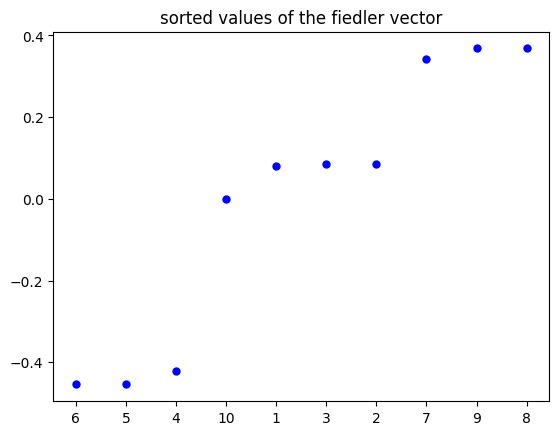

In [7]:
import numpy as np
sorted_fiedler_vector = np.sort(fiedler_vector)
plt.plot(sorted_fiedler_vector,'b.',markersize=10)
plt.title("sorted values of the fiedler vector")
tmp = plt.xticks(ticks = range(0,len(fiedler_vector)), labels = np.argsort(fiedler_vector)+1)

Repeat for the Karate Graph

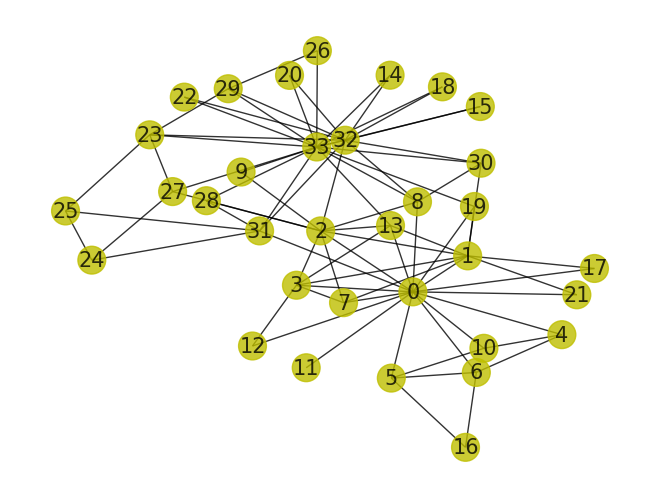

In [8]:
G = nx.karate_club_graph()
colormap = ['y' for nodes in list(G.nodes())]
pos = nx.nx_agraph.graphviz_layout(G,prog='neato')
plt.figure(1)
plt.clf()
nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 400,font_size = 15, alpha=0.8)

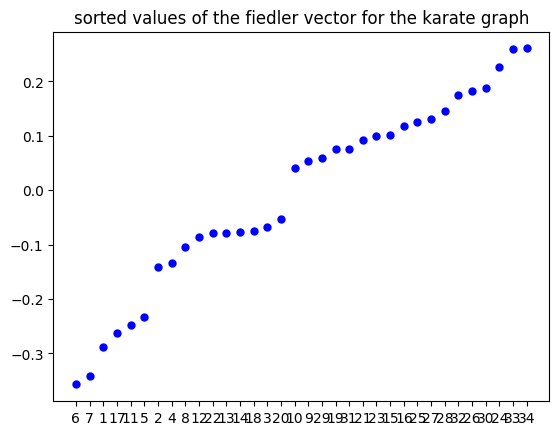

In [9]:
normalized_Laplacian = LA.normalized_laplacian_matrix(G).toarray()
import numpy as np
eig_values, eig_vectors = np.linalg.eig(normalized_Laplacian)
sorted_indices = np.argsort(eig_values)
fiedler_vector = eig_vectors[:,sorted_indices[1]]
sorted_fiedler_vector = np.sort(fiedler_vector)
plt.plot(sorted_fiedler_vector,'b.',markersize=10)
plt.title("sorted values of the fiedler vector for the karate graph")
tmp = plt.xticks(ticks = range(0,len(fiedler_vector)), labels = np.argsort(fiedler_vector)+1)

Cluster subjectively

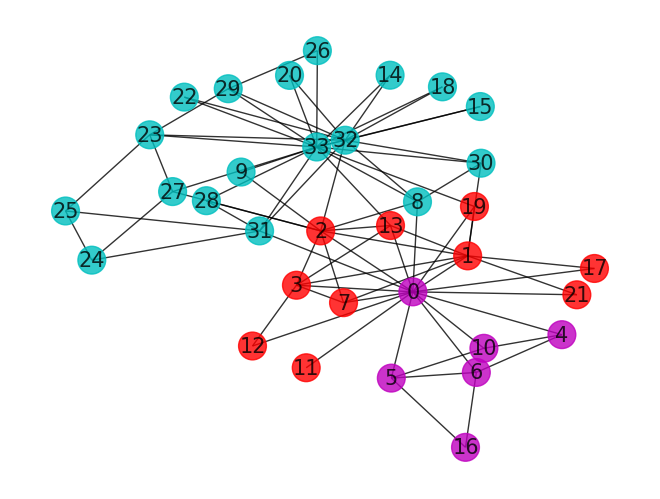

In [10]:
nodes_sorted_by_fiedler_value = np.argsort(fiedler_vector)
magenta_cluster = [i for i in range(len(fiedler_vector)) if fiedler_vector[i] <-0.2]
cyan_cluster = [i for i in range(len(fiedler_vector)) if fiedler_vector[i] >0]
red_cluster = [i for i in range(len(fiedler_vector)) if fiedler_vector[i] <=0 and fiedler_vector[i]>=-0.2]
colormap = ['y' for nodes in list(G.nodes())]
for node in list(G.nodes()):
    if node in magenta_cluster: colormap[node] = 'm'
    elif node in red_cluster: colormap[node] = 'r'
    elif node in cyan_cluster: colormap[node] = 'c'

nx.draw(G,pos,with_labels = True,node_color = colormap, node_size = 400,font_size = 15, alpha=0.8)

Text(0.5, 1.0, 'embedding of karate graph in 2D space')

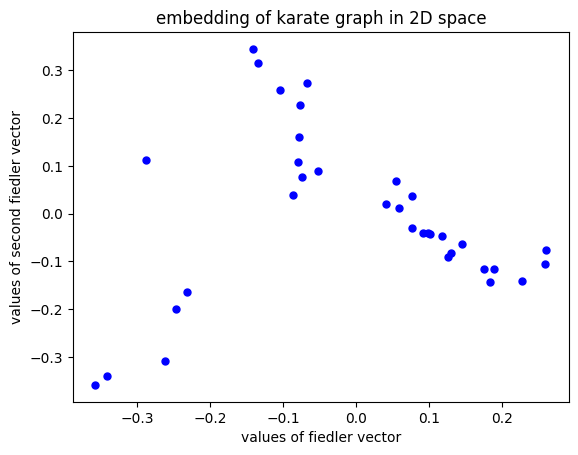

In [11]:
fiedler_vector = eig_vectors[:,sorted_indices[1]]
second_fiedler_vector = eig_vectors[:,sorted_indices[2]]
tmp = plt.plot(fiedler_vector,second_fiedler_vector,'b.',markersize = 10)
plt.xlabel('values of fiedler vector')
plt.ylabel('values of second fiedler vector')
plt.title('embedding of karate graph in 2D space')

***
## Random Walk Embeddings

Doing spectral embeddings using the graph Laplacian is based on defining similarity as the number of nodes in common. It is derived from minimizing the squared distance between nodes that share edges,

$\Delta^2 = \sum_{i}\sum_j A_{ij} (x_i-x_j)^2 = {\mathbf x}^TL{\mathbf x}$

Such encodings only look at adjacent edges, which means that the embeddings are based on very localized network properties. 

Random walk embeddings look at both local ahd higher order neighborhood information (quoting from https://www.youtube.com/watch?v=Xv0wRy66Big, minute 4:45)
***

Let look at how often different nodes are reached on a random walk of length $k$ when the random walk begins at node 16.

/var/folders/7n/9nnbl1td6sq50rrh09m9x1v80000gn/T/ipykernel_36270/1635669179.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


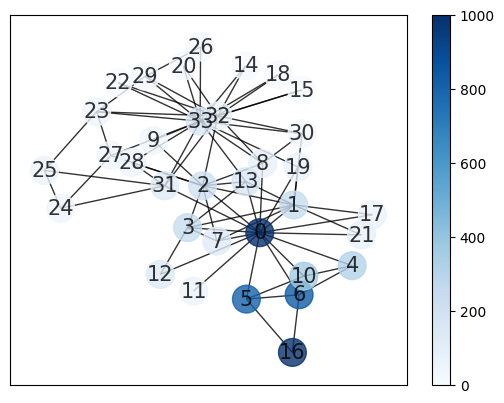

In [12]:
number_visits_dict = dict([(node,0) for node in list(G.nodes())])
total_nodes_visited = 0
walk_length = 10
num_trials = 100
starting_node = 16
for trials in range(num_trials):
    current_node = starting_node
    #print("node = ", current_node, "visited", number_visits_dict[current_node],"times")
    for step in range(walk_length):
        total_nodes_visited += 1
        number_visits_dict[current_node] += 1
        neighbors = list(G.neighbors(current_node))
        current_node = np.random.choice(neighbors)
values = [number_visits_dict[node] for node in number_visits_dict.keys()]
color_map = plt.get_cmap('Blues')
nx.draw_networkx(G,pos, with_labels = True, cmap = color_map,node_color = values, node_size = 400,font_size = 15, alpha = 0.8)
sm = plt.cm.ScalarMappable(cmap = color_map,norm=plt.Normalize(vmin = 0, vmax=total_nodes_visited))
plt.colorbar(sm)


The random walk starts at node 16 so naturally that node has the most visits. Node 16 only has two neighbors, nodes 5 and 6, so they also have a lot of visits. But look at node 0. It has the second most visits on the random walk because it is a hub in the local neighborhood. And even node 33 has a few visits since it's a hub in an adjacent neighborhood. Thus, random walks consider not only the immediate neighborhood but also broader neighborhood properties.

***
Node2vec uses biased random walks.

![biased random walk in node2vec](./figures/Node2vec_BiasedWalk.png)

I don't have time to construct biased random walks, but I still want to illustrate the next part of the algorithm: collecting the random walks into a training set. I'll use the unbiased random walks.

In [22]:
G = nx.karate_club_graph()
walk_dict = dict()
walk_length = 10
num_walks = 5
starting_node = 9
for walk_number in range(num_walks):
    current_node = starting_node
    walk = [current_node]
    for step in range(walk_length):
        neighbors = list(G.neighbors(current_node))
        current_node = np.random.choice(neighbors) # unbiased random walk
        walk.append(current_node)
    walk_dict[walk_number] = walk
#print(walk_dict)
[print(v) for v in walk_dict.values()]


[9, 2, 7, 0, 4, 0, 5, 0, 2, 28, 2]
[9, 33, 28, 33, 27, 23, 32, 2, 28, 2, 0]
[9, 33, 13, 3, 7, 2, 13, 0, 13, 2, 28]
[9, 2, 9, 33, 27, 2, 27, 33, 8, 32, 14]
[9, 33, 30, 32, 31, 28, 2, 0, 8, 33, 29]


[None, None, None, None, None]